## KOSPI Prophet Predict



In [79]:
import pandas as pd

df = pd.read_csv('kospi.csv', header = 0, index_col=0) # 738 data
original_df = pd.read_csv('kospi.csv', header = 0, index_col=0) # 738 data
df['ds'] = pd.to_datetime(df.index, format='%Y-%m-%d')
df['y'] = df['KOSPI']
df = df[['ds','y']]
df

,ds,y
Date,,
2020-01-02,2020-01-02,2175.17
2020-01-03,2020-01-03,2176.46
2020-01-06,2020-01-06,2155.07
2020-01-07,2020-01-07,2175.54
2020-01-08,2020-01-08,2151.31
...,...,...
2022-12-19,2022-12-19,2352.17
2022-12-20,2022-12-20,2333.29
2022-12-21,2022-12-21,2328.95


In [80]:
from prophet import Prophet

df_prophet = Prophet()
df_prophet.fit(df[:650])
df_forecast = df_prophet.make_future_dataframe(periods=88, freq = "D")
df_forecast.tail(10)

14:49:17 - cmdstanpy - INFO - Chain [1] start processing
14:49:17 - cmdstanpy - INFO - Chain [1] done processing


,ds
728,2022-11-04
729,2022-11-05
730,2022-11-06
731,2022-11-07
732,2022-11-08
733,2022-11-09
734,2022-11-10
735,2022-11-11
736,2022-11-12
737,2022-11-13


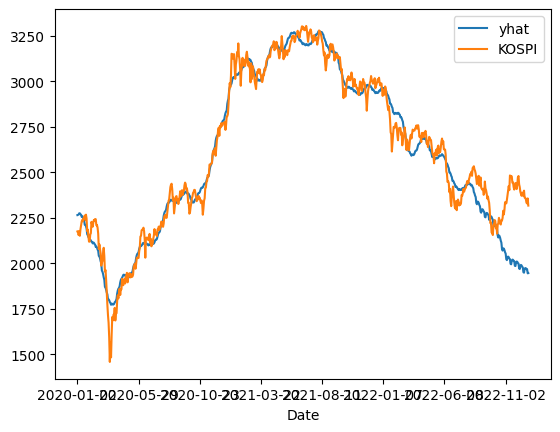

In [81]:
df_forecast = df_prophet.predict(df_forecast)

import matplotlib.pyplot as plt

df_forecast[['yhat']].plot()
original_df['KOSPI'].plot(label="KOSPI")
plt.legend()
plt.show()


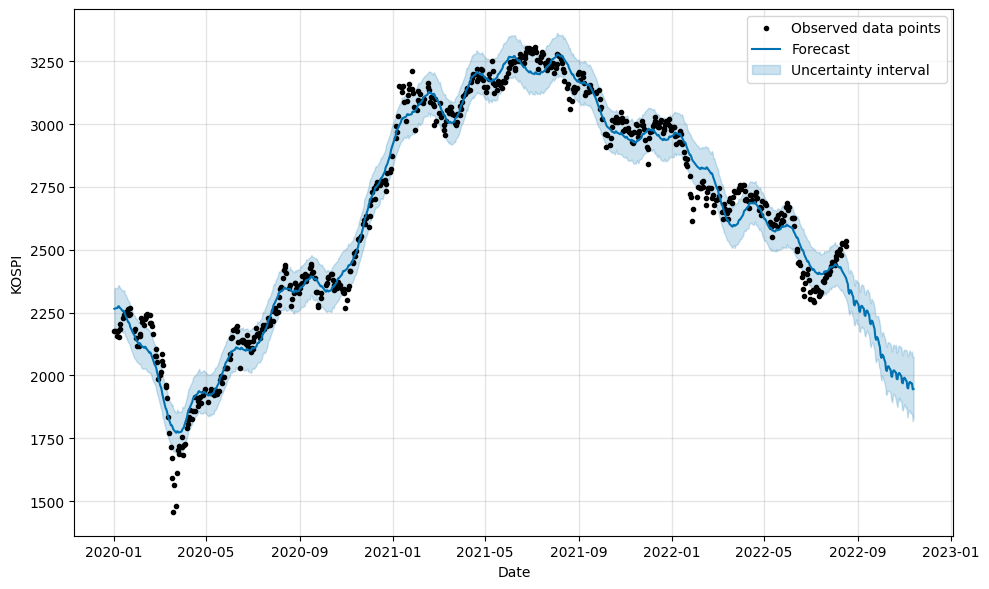

In [83]:
df_forecast = df_prophet.predict(df_forecast)

df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
df_prophet.plot(df_forecast, xlabel='Date', ylabel='KOSPI')
# original_df['KOSPI'].plot(label="KOSPI")
plt.legend()
plt.show()
